In [1]:
!pip install pyreadr

You should consider upgrading via the '/home/geev/Research/in_progress/Transgressions/transgressions-env/bin/python -m pip install --upgrade pip' command.


## Gathering all follower data into one csv file

In [2]:
import os
import pyreadr
import pandas as pd
from tqdm import tqdm

In [3]:
follower_dir = "./Barbera Political Ideology/poli_account_followers/followers-lists-202008"

In [4]:
follower_files = os.listdir(follower_dir)

In [6]:
len(follower_files)

460

In [7]:
followers_dict = {"account":[], "id_str":[]}
for follower_file in tqdm(follower_files):
    followers = pyreadr.read_r(os.path.join(follower_dir, follower_file))["followers"]["followers"]
    followers_dict["account"].extend([follower_file.split(".")[0]]*len(followers))
    followers_dict["id_str"].extend(followers)


100%|██████████| 460/460 [00:18<00:00, 25.16it/s]


In [111]:
pd.DataFrame(followers_dict).to_csv("./{}_account_followers.csv".format(len(follower_files)), index=False)

## Creating adjacency matrix for condemnation dataset users

In [160]:
# finding the users
import pickle
# open a file, where you stored the pickled data
pred_data_path = '../../data/5_mil_7days_metoo.p'
file = open(pred_data_path, 'rb')
pred_data = pickle.load(file)
file.close()

In [161]:
#loading the political account followers csv
followers_df = pd.read_csv("./460_account_followers.csv")
followers_df

,account,id_str
0,RoyBlunt,1434201858864726019
1,RoyBlunt,1469657120283009025
2,RoyBlunt,1373365280508809219
3,RoyBlunt,1262788067057979395
4,RoyBlunt,1470943571180150787
...,...,...
22230396,RepAnthonyBrown,713094905552248832
22230397,RepAnthonyBrown,1408858718
22230398,RepAnthonyBrown,19650150
22230399,RepAnthonyBrown,22781325


In [162]:
# Trying join on dfs
user_ids = list(np.int64(id) for id in set(pred_data["user_id"]))
user_id_df = pd.DataFrame({"id_str":user_ids})
user_id_df

,id_str
0,808476381516591104
1,345000881
2,823714199859765248
3,788593457434615809
4,612799235
...,...
1527225,300642262
1527226,809764340
1527227,601670922
1527228,5906332


In [163]:
join_df = pd.merge(followers_df, user_id_df, how="inner", on="id_str")

In [165]:
join_df

,account,id_str
0,RoyBlunt,18248053
1,RepYoungKim,18248053
2,SenatorRisch,18248053
3,RepJeffDuncan,18248053
4,SenMarkey,18248053
...,...,...
1544861,RepAnthonyBrown,3047112783
1544862,RepAnthonyBrown,132810614
1544863,RepAnthonyBrown,3001760728
1544864,RepAnthonyBrown,634649409


---------

In [166]:
poli_accounts = join_df["account"].unique()

In [167]:
poli_accounts

array(['RoyBlunt', 'RepYoungKim', 'SenatorRisch', 'RepJeffDuncan',
       'SenMarkey', 'SenatorBurr', 'ChrisCoons', 'SenatorFischer',
       'SenatorShaheen', 'SenJoniErnst', 'SenJohnHoeven', 'SenatorCarper',
       'RepSpeier', 'RepSteel', 'RepTenney', 'RepJahanaHayes',
       'SenShelby', 'SenatorLankford', 'SenatorSinema', 'SenThomTillis',
       'JacksonLeeTX18', 'RepWexton', 'SenTinaSmith', 'ChrisVanHollen',
       'StaceyPlaskett', 'SenJohnBarrasso', 'BradSherman',
       'SenDanSullivan', 'senrobportman', 'MikeCrapo', 'MarshaBlackburn',
       'JohnBoozman', 'SenJohnThune', 'JerryMoran', 'RepKarenBass',
       'RepSpanberger', 'SteveDaines', 'RepAlGreen', 'RepLucyMcBath',
       'SenatorWicker', 'SenatorRounds', 'RepElaineLuria',
       'RepJohnYarmuth', 'RepMcGovern', 'RepRichardNeal', 'RepDean',
       'RepGregSteube', 'RepMaryMiller', 'RepMikeGarcia',
       'RepMikeJohnson', 'RepBuddyCarter', 'RepTroyNehls',
       'DrNealDunnFL2', 'RepDrewFerguson', 'michaelcburgess',
     

In [201]:
# creating a matrix of all zeros rows=user_ids  cols=poli_account_names
adj_matrix = pd.DataFrame(0, index=join_df["id_str"].unique(), columns=join_df["account"].unique())

In [202]:
adj_matrix

,RoyBlunt,RepYoungKim,SenatorRisch,RepJeffDuncan,SenMarkey,SenatorBurr,ChrisCoons,SenatorFischer,SenatorShaheen,SenJoniErnst,...,RepBourdeaux,RepDavidTrone,RepEBJ,RepCheri,USRepKeating,RepBrianHiggins,SenOssoff,EconUS,SenatorMarshall,BlumenauerMedia
18248053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43358979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267456386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302539624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39548416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047112783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132810614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001760728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634649409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
for poli_account in tqdm(join_df["account"].unique()):
    followers_in_users = join_df[join_df["account"]==poli_account]["id_str"]
    adj_matrix[poli_account][followers_in_users]=1

100%|██████████| 460/460 [00:28<00:00, 16.04it/s]


In [207]:
adj_matrix

,RoyBlunt,RepYoungKim,SenatorRisch,RepJeffDuncan,SenMarkey,SenatorBurr,ChrisCoons,SenatorFischer,SenatorShaheen,SenJoniErnst,...,RepBourdeaux,RepDavidTrone,RepEBJ,RepCheri,USRepKeating,RepBrianHiggins,SenOssoff,EconUS,SenatorMarshall,BlumenauerMedia
18248053,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
43358979,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267456386,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302539624,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
39548416,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047112783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132810614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001760728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634649409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
adj_matrix.to_csv("./adjacency_{}_poli_accounts.csv".format(len(adj_matrix.columns)))

(array([809.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  26.2,  52.4,  78.6, 104.8, 131. , 157.2, 183.4, 209.6,
        235.8, 262. ]),
 <BarContainer object of 10 artists>)

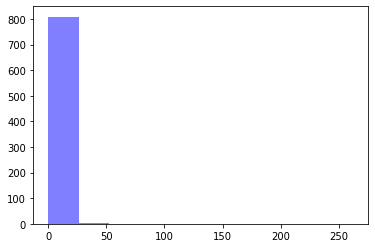

In [95]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.hist(matched_count, facecolor='blue', alpha=0.5)

In [77]:
user_id =user_ids[4]

In [78]:
user_id

'612799235'

In [79]:
followers_df[followers_df["id_str"]==user_id]

,Unnamed: 0,account,id_str


In [26]:
os.listdir("./Barbera Political Ideology/poli_account_followers/")

['followers-lists-202008csvsRepBonnie.csv',
 'followers-lists-202008csvsSenAlexPadilla.csv',
 'followers-lists-202008csvsRepTeresaLF.csv',
 'followers-lists-202008csvsRepBrianMast.csv',
 'followers-lists-202008csvsRepTrey.csv',
 'followers-lists-202008csvsRepBoebert.csv',
 'followers-lists-202008csvsRepHuizenga.csv',
 'followers-lists-202008csvsRepDavidEPrice.csv',
 'followers-lists-202008csvsRepSylviaGarcia.csv',
 'followers-lists-202008csvsSenJoniErnst.csv',
 'followers-lists-202008csvsRepKweisiMfume.csv',
 'followers-lists-202008csvsRepDustyJohnson.csv',
 'followers-lists-202008csvsRepVanTaylor.csv',
 'followers-lists-202008csvsRepGregSteube.csv',
 'followers-lists-202008csvsRepHuffman.csv',
 'followers-lists-202008csvsSenatorShaheen.csv',
 'followers-lists-202008csvsRepFranklin.csv',
 'followers-lists-202008csvsRepWexton.csv',
 'followers-lists-202008csvsSenatorSinema.csv',
 'followers-lists-202008csvsRepFitzgerald.csv',
 'followers-lists-202008csvsUSRepGaryPalmer.csv',
 'followers

In [27]:
pd.read_csv("./Barbera Political Ideology/poli_account_followers/followers-lists-202008csvsRepBonnie.csv")

,RDX3
0,X
1,NaN
2,2826598392
3,2804036809
4,2894071885
...,...
9080,2388721866
9081,2162493972
9082,2225514206
9083,1201878402
